In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('Amreli NRM data for model building1.csv')
# campaign = np.unique(df['campaign'])

# for c in campaign:
#     dfc = df[df['campaign']==c]
#     i = dfc.index[0]
#     df = df.drop(i)
df = df[df['Heat number (life number)']>1]    
df = df.reset_index(drop=True)
df['Number of capacitors removed'].fillna(0, inplace=True)
threshold = 150

for i in range(df.shape[0]):
    if(df.loc[i,'Total Heat Time previous (minutes)']>threshold):
        df.loc[i,'Total Heat Time previous (minutes)']= threshold
    if(df.loc[i,'Total Heat Time (minutes)']>threshold):
        df.loc[i,'Total Heat Time (minutes)']= threshold
        
df['Input energy previous (KWH)'] = df['Power previous']*df['Total Heat Time previous (minutes)']/60
df['Input energy (KWH)'] = df['Power']*df['Total Heat Time (minutes)']/60


In [3]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df['Efficiency (MT/KWH)'])

0      0.001500
1      0.001582
2      0.001628
3      0.001568
4      0.001669
5      0.001524
6      0.001514
7      0.001530
8      0.001617
9      0.001590
10     0.001649
11     0.001577
12     0.001629
13     0.001602
14     0.001659
15     0.001616
16     0.001725
17     0.001661
18     0.001647
19     0.001675
20     0.001615
21     0.001574
22     0.001480
23     0.001691
24     0.001610
25     0.001561
26     0.001444
27     0.001823
28     0.001670
29     0.001605
30     0.001610
31     0.001611
32     0.001524
33     0.001661
34     0.001597
35     0.001630
36     0.001659
37     0.001676
38     0.001675
39     0.001734
40     0.001669
41     0.001522
42     0.001634
43     0.001506
44     0.001534
45     0.001537
46     0.001566
47     0.001563
48     0.001563
49     0.001480
50     0.001606
51     0.001444
52     0.001609
53     0.001600
54     0.001662
55     0.001560
56     0.001722
57     0.001588
58     0.001603
59     0.001702
60     0.001528
61     0.001587
62     0

# Model 5: All inputs and All outputs 

In [4]:
# input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Voltage', 'Total Heat Time previous (minutes)',
#                  'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating','Number of capacitors removed','Tapping Temperature (C)','Input energy previous (KWH)']
# output_columns = ['Efficiency (MT/KWH)','Total Heat Time (minutes)','Voltage','Frequency','Refractory lining after heating']

# input_columns = ['Input (MT)','Previous Voltage', 
#                  'Previous Frequency','Previous Rating of the Furnace', 'Refractory lining before heating','Tapping Temperature (C)']
# output_columns = ['Efficiency (MT/KWH)','Total Heat Time (minutes)','Voltage','Frequency','Refractory lining after heating']

input_columns = ['Scrap (MT)', 'Sponge (MT)', 'Hot Heel (MT)', 'Alloys (MT)','Previous Input (MT)','Previous Voltage', 'Total Heat Time previous (minutes)',
                 'Previous Frequency','Previous Rating of the Furnace','Previous Output (MT)', 'Refractory lining before heating','Number of capacitors removed','Tapping Temperature (C)','Input energy previous (KWH)']
output_columns = ['Efficiency (MT/KWH)','Total Heat Time (minutes)','Voltage','Frequency','Refractory lining after heating']


In [5]:
X = df[input_columns]
X_train = X.iloc[:318,:].values
X_test = X.iloc[318:,:].values
y = df[output_columns]
y_train = y.iloc[:318,:].values
y_test = y.iloc[318:,:].values

In [6]:
X_train.shape

(318, 14)

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()

normalized_X_train = scaler1.fit_transform(X_train)
normalized_X_test = scaler1.transform(X_test)

scaler2 = MinMaxScaler()
normalized_y_train = scaler2.fit_transform(y_train)
normalized_y_test = scaler2.transform(y_test)

In [8]:
## Keras NN
## model = Sequential()
n_input = X_train.shape[1] # number of features
n_hidden_1 = 500
n_hidden_2 = 100
n_hidden_3 = 50
n_hidden_4 = 150
n_hidden_5 = 100
n_hidden_6 = 50
n_hidden_7 = 25
num_digits = 5
n_output = 5

Inp = Input(shape=(n_input,))
x = Dense(n_hidden_1, activation='relu')(Inp)
# x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
# x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
# x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
# x = Dense(n_hidden_5, activation='relu', name = "Hidden_Layer_5")(x)
# x = Dense(n_hidden_6, activation='relu', name = "Hidden_Layer_6")(x)
# x = Dense(n_hidden_7, activation='relu', name = "Hidden_Layer_7")(x)

output = Dense(num_digits, activation='relu', name = "Output_Layer")(x)
    
model = Model(Inp, output)
model.summary() 
learning_rate = 0.001
training_epochs = 500
batch_size = 5
sgd = optimizers.SGD(lr=learning_rate)
model.compile(loss=tf.keras.losses.MeanSquaredError(),
                  optimizer='adam',
                  metrics=['mse'])
    
history = model.fit(normalized_X_train, normalized_y_train,
                         batch_size = batch_size,
                         epochs = training_epochs,
                         verbose = 2)


pred_train = model.predict(normalized_X_train)
y_pred_train = scaler2.inverse_transform(pred_train)
pred_test = model.predict(normalized_X_test)
y_pred_test = scaler2.inverse_transform(pred_test)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
dense (Dense)                (None, 500)               7500      
_________________________________________________________________
Output_Layer (Dense)         (None, 5)                 2505      
Total params: 10,005
Trainable params: 10,005
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
64/64 - 0s - loss: 0.1511 - mse: 0.1511
Epoch 2/500
64/64 - 0s - loss: 0.0311 - mse: 0.0311
Epoch 3/500
64/64 - 0s - loss: 0.0289 - mse: 0.0289
Epoch 4/500
64/64 - 0s - loss: 0.0284 - mse: 0.0284
Epoch 5/500
64/64 - 0s - loss: 0.0281 - mse: 0.0281
Epoch 6/500
64/64 - 0s - loss: 0.0282 - mse: 0.0282
Epoch 7/500
64/64 - 0s - loss: 0.0277 - mse: 0.0277
Epoch 8/500
64/6

Epoch 141/500
64/64 - 0s - loss: 0.0255 - mse: 0.0255
Epoch 142/500
64/64 - 0s - loss: 0.0257 - mse: 0.0257
Epoch 143/500
64/64 - 0s - loss: 0.0256 - mse: 0.0256
Epoch 144/500
64/64 - 0s - loss: 0.0255 - mse: 0.0255
Epoch 145/500
64/64 - 0s - loss: 0.0253 - mse: 0.0253
Epoch 146/500
64/64 - 0s - loss: 0.0254 - mse: 0.0254
Epoch 147/500
64/64 - 0s - loss: 0.0255 - mse: 0.0255
Epoch 148/500
64/64 - 0s - loss: 0.0253 - mse: 0.0253
Epoch 149/500
64/64 - 0s - loss: 0.0253 - mse: 0.0253
Epoch 150/500
64/64 - 0s - loss: 0.0253 - mse: 0.0253
Epoch 151/500
64/64 - 0s - loss: 0.0254 - mse: 0.0254
Epoch 152/500
64/64 - 0s - loss: 0.0256 - mse: 0.0256
Epoch 153/500
64/64 - 0s - loss: 0.0255 - mse: 0.0255
Epoch 154/500
64/64 - 0s - loss: 0.0253 - mse: 0.0253
Epoch 155/500
64/64 - 0s - loss: 0.0254 - mse: 0.0254
Epoch 156/500
64/64 - 0s - loss: 0.0253 - mse: 0.0253
Epoch 157/500
64/64 - 0s - loss: 0.0254 - mse: 0.0254
Epoch 158/500
64/64 - 0s - loss: 0.0252 - mse: 0.0252
Epoch 159/500
64/64 - 0s - l

Epoch 293/500
64/64 - 0s - loss: 0.0245 - mse: 0.0245
Epoch 294/500
64/64 - 0s - loss: 0.0246 - mse: 0.0246
Epoch 295/500
64/64 - 0s - loss: 0.0247 - mse: 0.0247
Epoch 296/500
64/64 - 0s - loss: 0.0248 - mse: 0.0248
Epoch 297/500
64/64 - 0s - loss: 0.0248 - mse: 0.0248
Epoch 298/500
64/64 - 0s - loss: 0.0247 - mse: 0.0247
Epoch 299/500
64/64 - 0s - loss: 0.0246 - mse: 0.0246
Epoch 300/500
64/64 - 0s - loss: 0.0246 - mse: 0.0246
Epoch 301/500
64/64 - 0s - loss: 0.0247 - mse: 0.0247
Epoch 302/500
64/64 - 0s - loss: 0.0247 - mse: 0.0247
Epoch 303/500
64/64 - 0s - loss: 0.0246 - mse: 0.0246
Epoch 304/500
64/64 - 0s - loss: 0.0246 - mse: 0.0246
Epoch 305/500
64/64 - 0s - loss: 0.0247 - mse: 0.0247
Epoch 306/500
64/64 - 0s - loss: 0.0246 - mse: 0.0246
Epoch 307/500
64/64 - 0s - loss: 0.0247 - mse: 0.0247
Epoch 308/500
64/64 - 0s - loss: 0.0246 - mse: 0.0246
Epoch 309/500
64/64 - 0s - loss: 0.0246 - mse: 0.0246
Epoch 310/500
64/64 - 0s - loss: 0.0246 - mse: 0.0246
Epoch 311/500
64/64 - 0s - l

Epoch 445/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 446/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 447/500
64/64 - 0s - loss: 0.0022 - mse: 0.0022
Epoch 448/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 449/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 450/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 451/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 452/500
64/64 - 0s - loss: 0.0020 - mse: 0.0020
Epoch 453/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 454/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 455/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 456/500
64/64 - 0s - loss: 0.0021 - mse: 0.0021
Epoch 457/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 458/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 459/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 460/500
64/64 - 0s - loss: 0.0018 - mse: 0.0018
Epoch 461/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 462/500
64/64 - 0s - loss: 0.0019 - mse: 0.0019
Epoch 463/500
64/64 - 0s - l

In [9]:
for i in range(num_digits):
    print(output_columns[i])
    print("Train score is {}".format(mean_squared_error(y_train[:,i], y_pred_train[:,i])))
    print("Test score is {}".format(mean_squared_error(y_test[:,i], y_pred_test[:,i])))
    print("R2 score is {}".format(r2_score(y_test[:,i], y_pred_test[:,i])))
    print("Train NMSE score is {}".format(np.sum(np.square(y_pred_train[:,i]-y_train[:,i]))/np.sum(np.square(y_train[:,i]-np.mean(y_train[:,i])))*100))
    print("Test NMSE score is {}".format(np.sum(np.square(y_pred_test[:,i]-y_test[:,i]))/np.sum(np.square(y_test[:,i]-np.mean(y_test[:,i])))*100))



Efficiency (MT/KWH)
Train score is 1.0092953768461949e-08
Test score is 1.0493735518293878e-08
R2 score is -1.558040650739692
Train NMSE score is 35.50208350187902
Test NMSE score is 255.8040650739692
Total Heat Time (minutes)
Train score is 55.761856865729044
Test score is 156.6106807927536
R2 score is 0.1659907250035887
Train NMSE score is 31.853973236076165
Test NMSE score is 83.40092749964113
Voltage
Train score is 1138.757678785789
Test score is 8304.598694582943
R2 score is 0.7555574621968097
Train NMSE score is 4.15814421811611
Test NMSE score is 24.44425378031902
Frequency
Train score is 5.8282928363121345
Test score is 26.098907639722906
R2 score is 0.9673645031795993
Train NMSE score is 0.7146756382427943
Test NMSE score is 3.263549682040064
Refractory lining after heating
Train score is 0.0002744240876905906
Test score is 0.0010529749591018803
R2 score is 0.9983735374706092
Train NMSE score is 0.042861713063106606
Test NMSE score is 0.16264625293907795


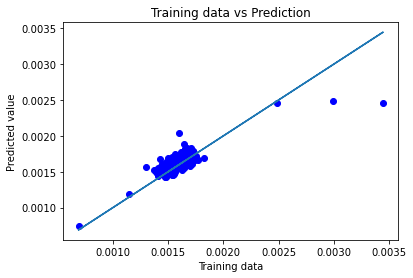

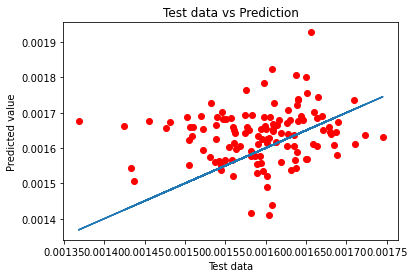

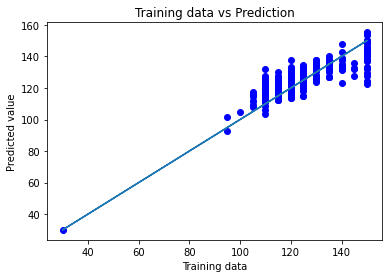

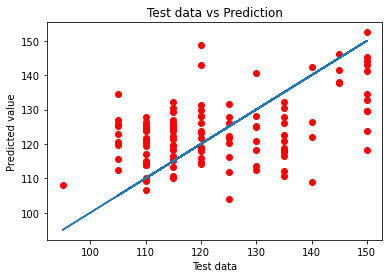

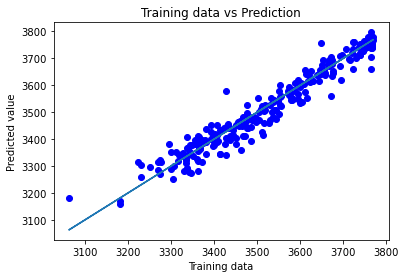

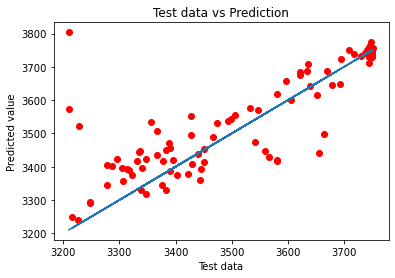

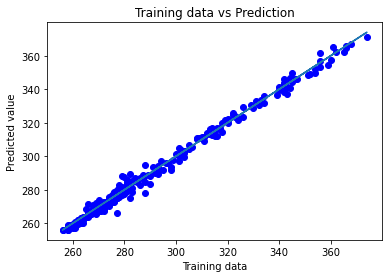

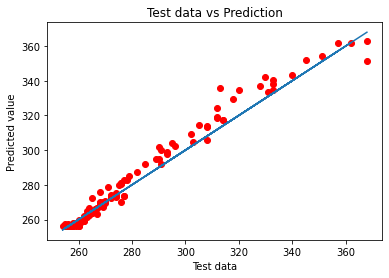

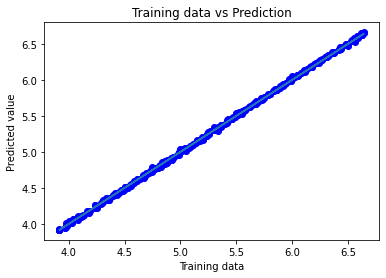

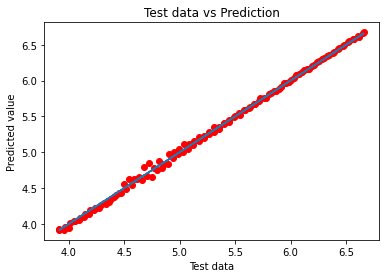

In [10]:
for i in range(num_digits):
    plt.scatter(y_train[:,i], y_pred_train[:,i], c='b')
    plt.plot(y_train[:,i],y_train[:,i])
    plt.xlabel('Training data')
    plt.ylabel('Predicted value')
    plt.title('Training data vs Prediction')
    plt.show()
    plt.scatter(y_test[:,i], y_pred_test[:,i], c='r')
    plt.plot(y_test[:,i],y_test[:,i])
    plt.xlabel('Test data')
    plt.ylabel('Predicted value')
    plt.title('Test data vs Prediction')
    plt.show()
